In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "~/isomirs/Bimodal_mir22/"
df = pd.read_csv(path+'isomiR_CPM.tsv', sep = '\t')
cond_cancer = df.columns.str.contains('-0[1-9][A-Z]', regex = True)
df_cancer = df[df.columns[cond_cancer]]

mirna22 = df_cancer.loc["hsa-miR-22-3p|+1|0"] 
left, right = mirna22[mirna22 < 11].index, mirna22[mirna22 > 11].index

In [3]:
data = pd.read_csv("TCGA-BRCA.GDC_phenotype.tsv", sep = '\t', index_col = 0)
# заменяем пропущенные значения на наны
data = data.replace('Not Reported', np.NaN)
data = data.replace('not reported', np.NaN)
data[data.columns[~np.array([len(data[i].unique()) < 2 for i in data.columns])]]
data
# добавляю столбец, обозначающий экспрессию микроРНК - 0: <11, 1: > 11
BRCA = data.copy()
BRCA['MiRNA'] = np.array([1 if i in left else 0 for i in data.index])


# оставляю только столбцы, где < 50% пропущенных значений
mask = (BRCA.isna().sum() > BRCA.shape[0]/2) | BRCA.columns.str.contains('id|code|file_name', regex = True)
BRCA = BRCA[BRCA.columns[~mask]]

In [15]:
def hist(types):
    fig, axs = plt.subplots(3, 2, figsize = (20, 26))
    for i in range(3):
        for j in range(2):
            sns.histplot(data = BRCA, x = types[i][j], hue = 'MiRNA', hue_order = [0, 1], 
                         palette = 'pastel', multiple='stack', ax = axs[i][j])
            axs[i][j].tick_params(axis='x', labelrotation = 90)
    plt.show()

In [16]:
types1 = [["axillary_lymph_node_stage_method_type", "breast_carcinoma_surgical_procedure_name"],
          ["cytokeratin_immunohistochemistry_staining_method_micrometastasis_indicator", "history_of_neoadjuvant_treatment"], 
        ["initial_pathologic_diagnosis_method", "lost_follow_up"]]

types2 = [["margin_status", "menopause_status"], 
          ["other_dx", "pathologic_M"], 
        ["pathologic_N", "pathologic_T"]]

types3 = [["person_neoplasm_cancer_status", "postoperative_rx_tx"], 
          ["primary_lymph_node_presentation_assessment", "radiation_therapy"], 
          ["system_version", "tissue_prospective_collection_indicator"]]

types4 = [["vial_number", "vital_status.demographic"],
         ["prior_malignancy.diagnoses", "prior_treatment.diagnoses"],
         ["site_of_resection_or_biopsy.diagnoses", "tissue_or_organ_of_origin.diagnoses"]]

types5 = [["tumor_stage.diagnoses", "disease_type"],
         ["is_ffpe.samples", "oct_embedded.samples"],
         ["sample_type.samples", "batch_number"]]

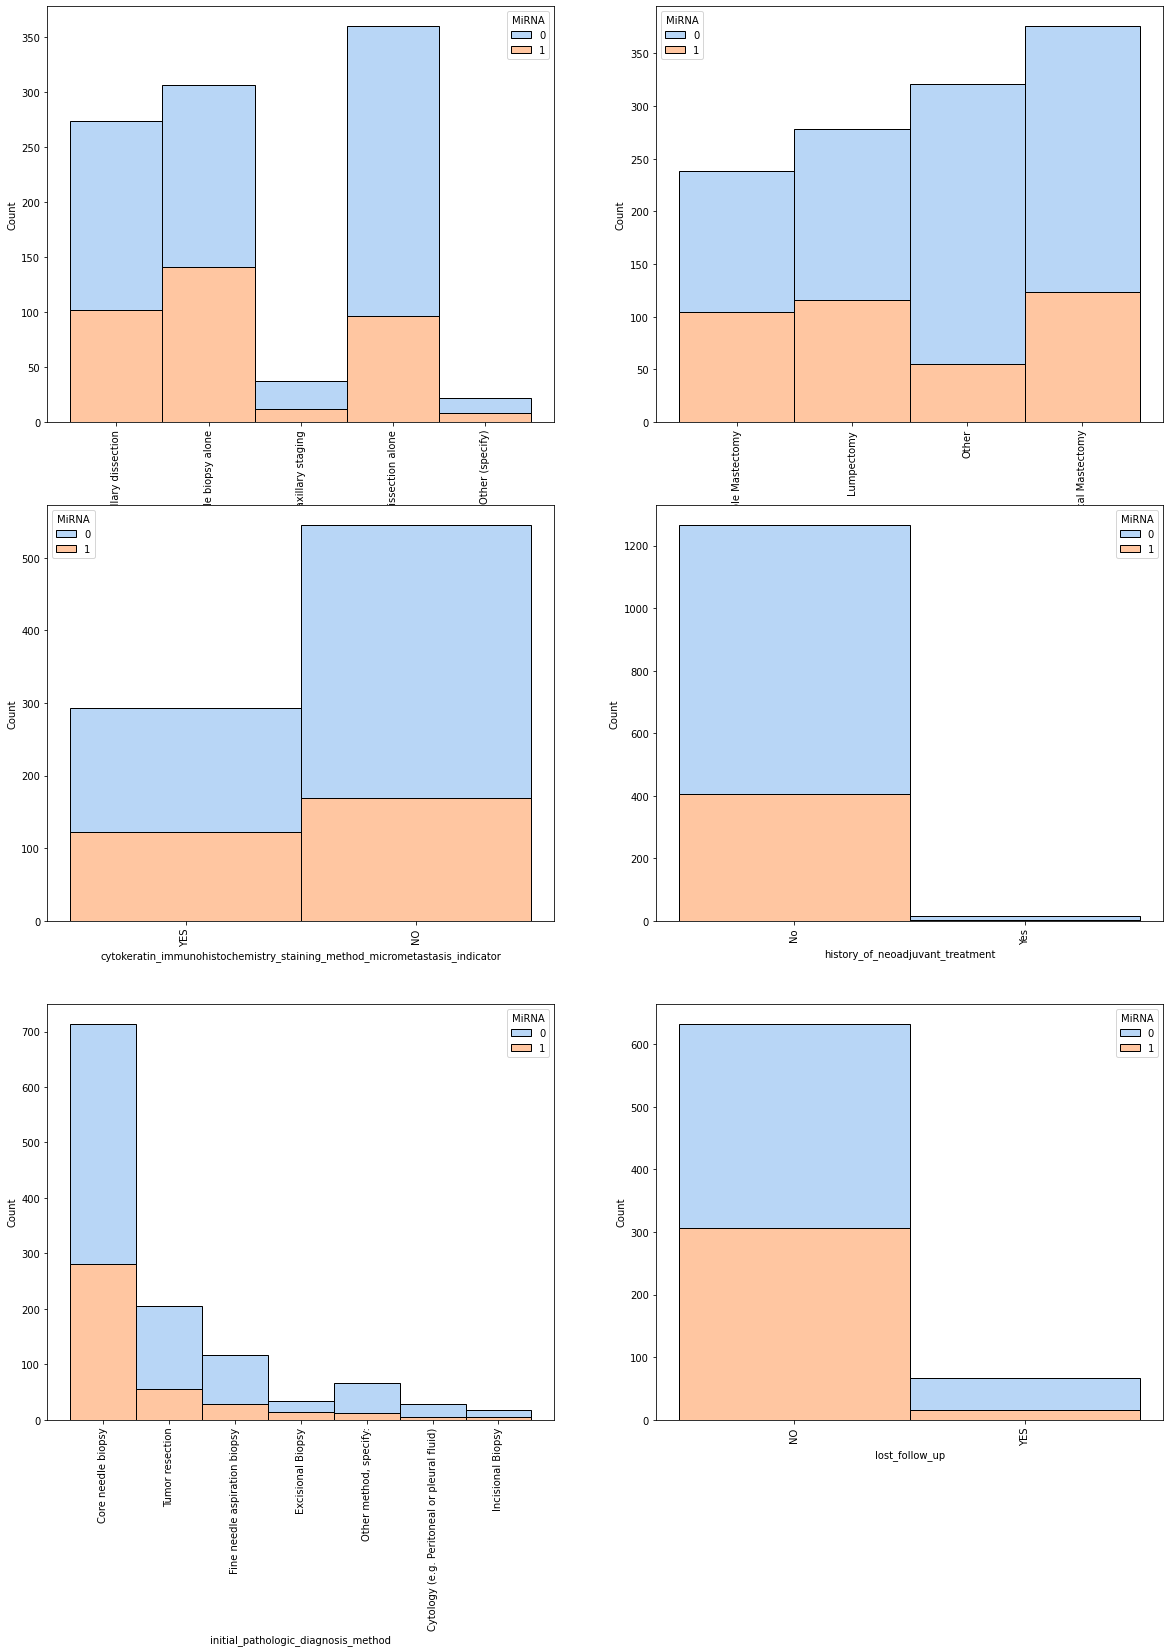

In [17]:
hist(types1)

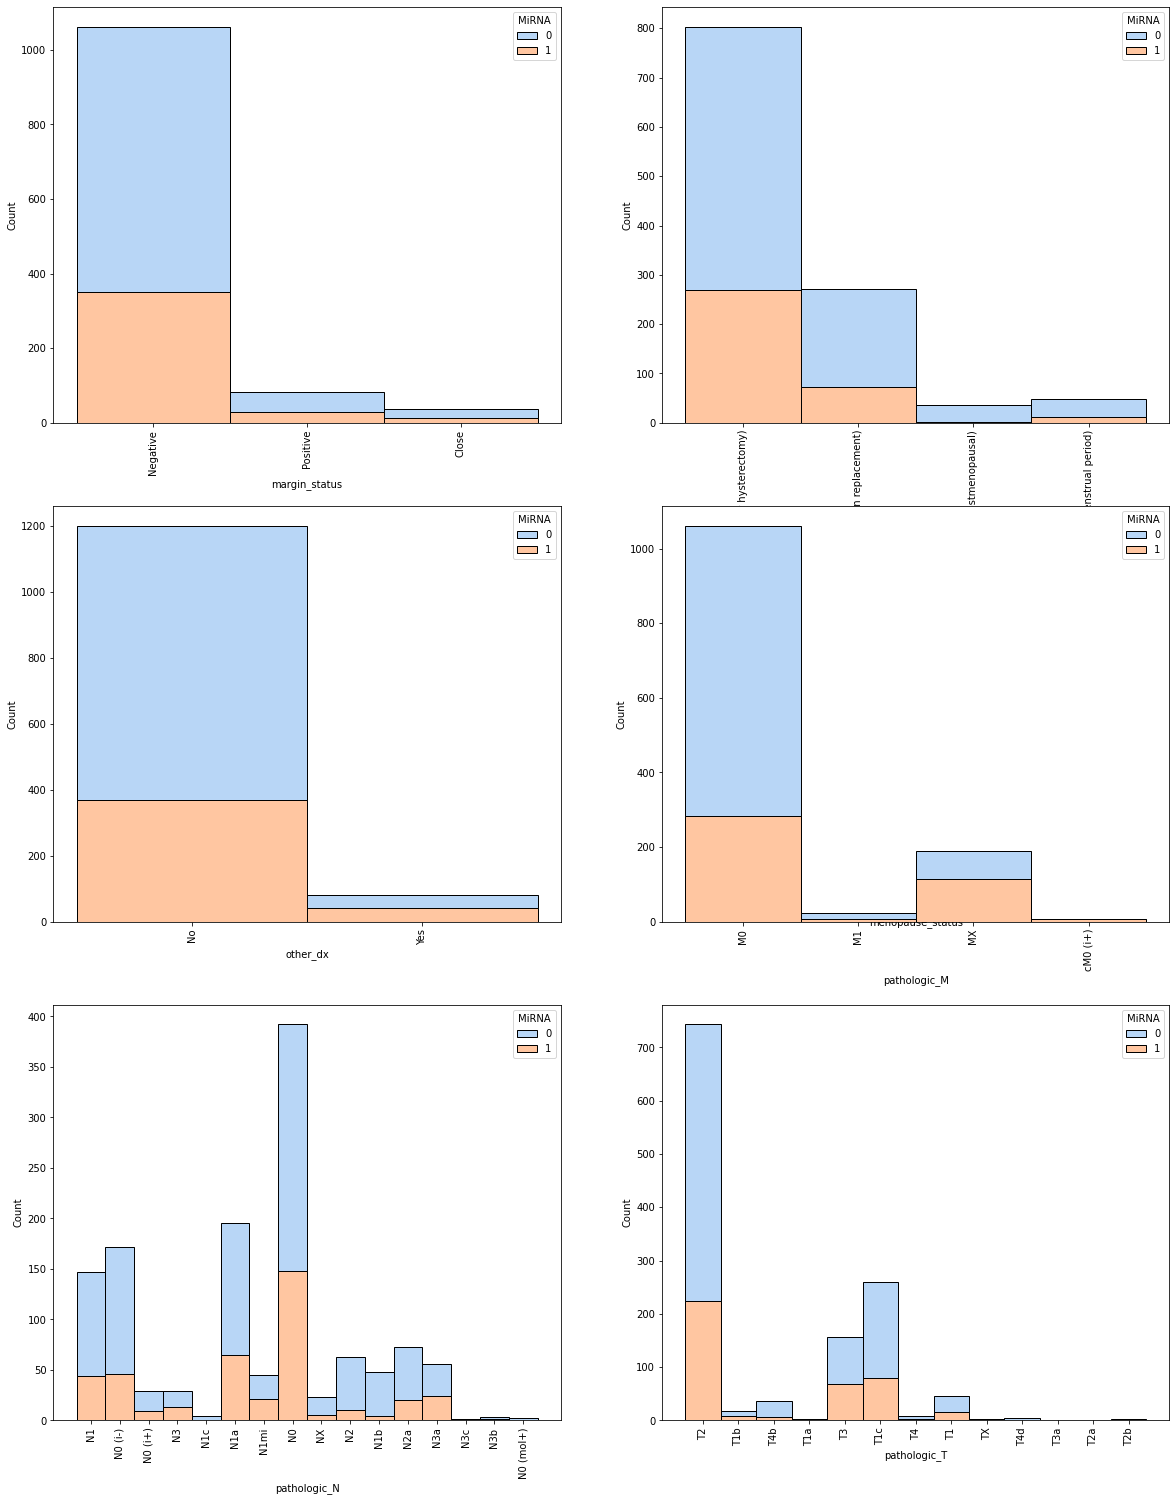

In [18]:
hist(types2)

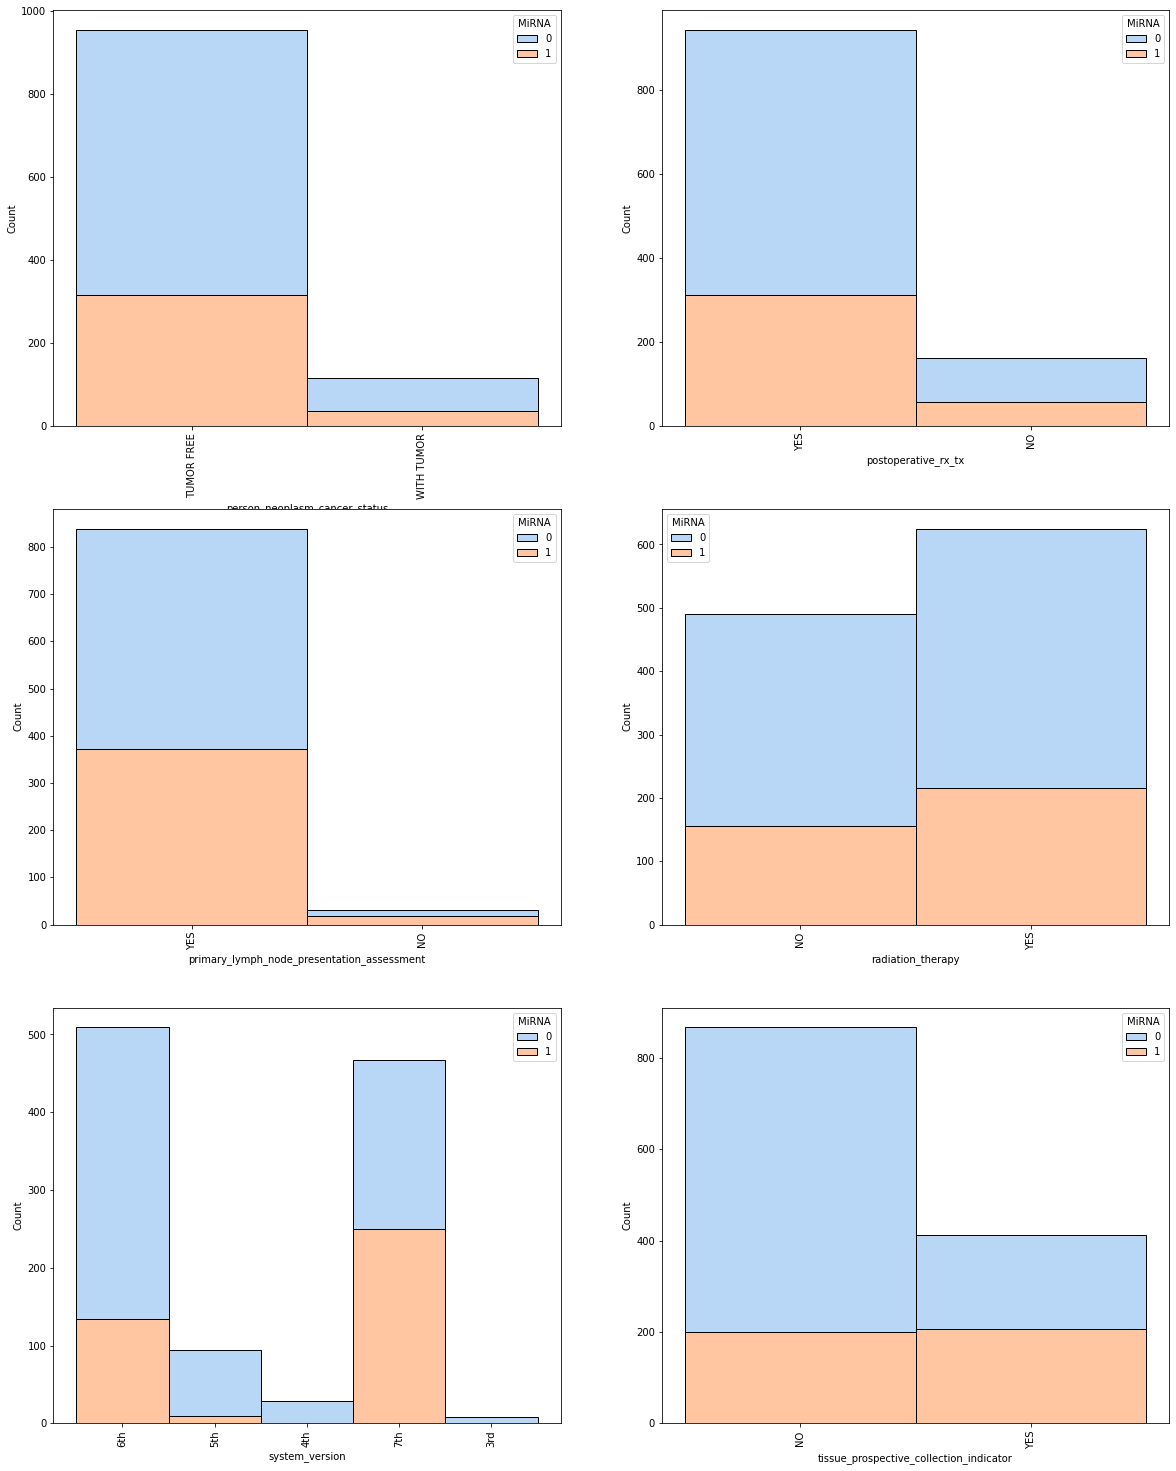

In [19]:
hist(types3)

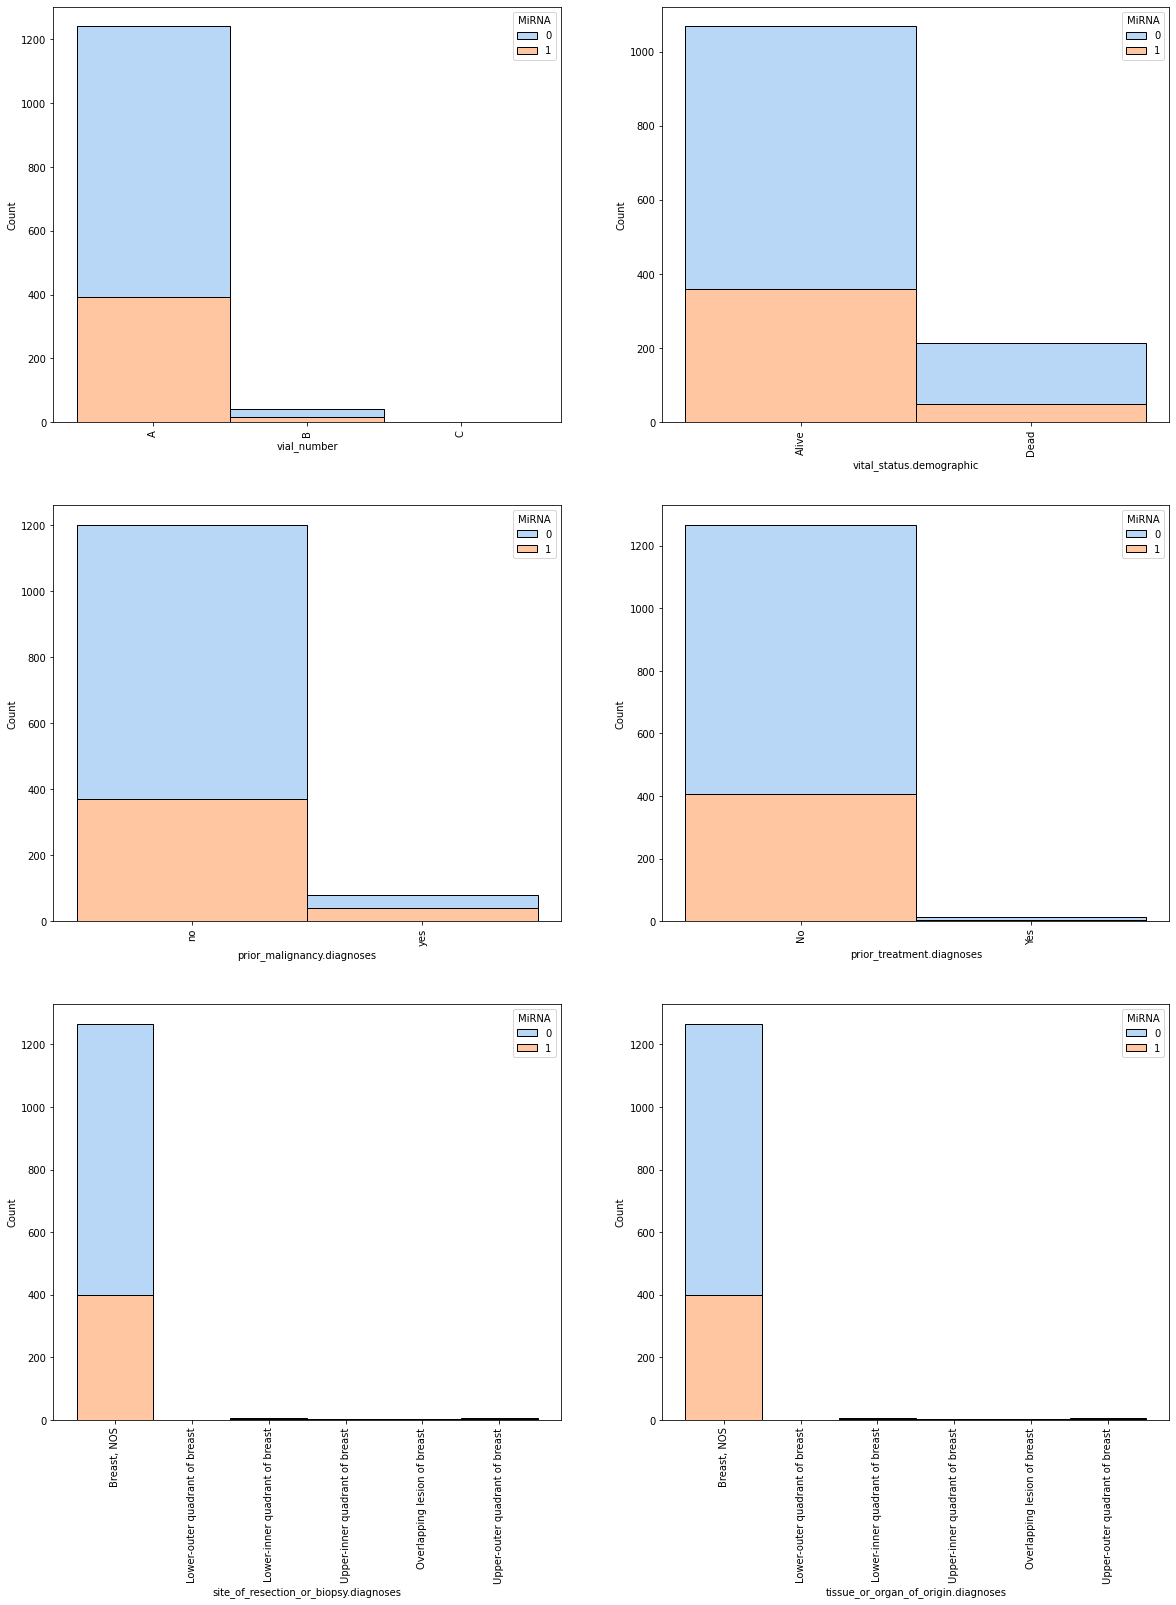

In [20]:
hist(types4)

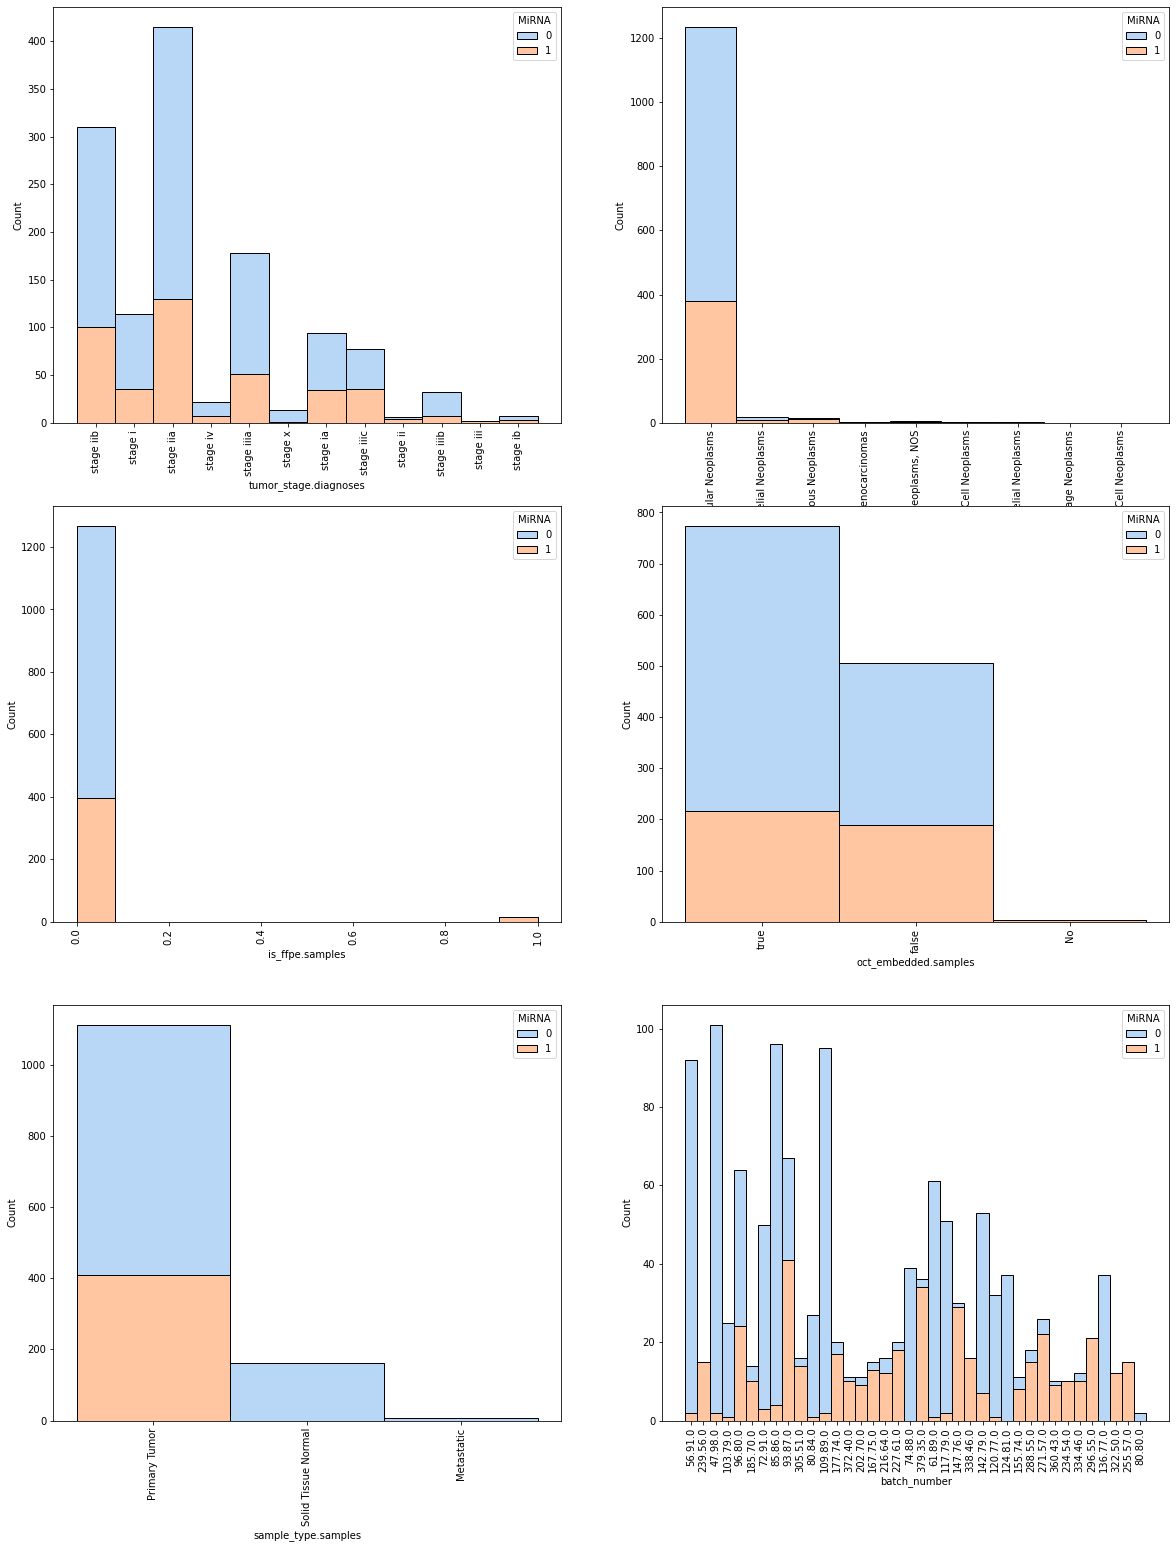

In [21]:
BRCA["is_ffpe.samples"] = BRCA["is_ffpe.samples"].dropna().astype(int)
hist(types5)

In [23]:
BRCA['batch_number'].describe()

count        1284
unique         38
top       47.98.0
freq          101
Name: batch_number, dtype: object

In [38]:
new_b = list(map(lambda i: int(i.split('.')[0]) + int(i.split('.')[1])/100, BRCA["batch_number"].values))
BRCA['batch_number'] = new_b
BRCA = BRCA.sort_values(by = 'batch_number')
BRCA.tail(20)

AttributeError: 'numpy.float64' object has no attribute 'split'

In [41]:
data['batch_number']

submitter_id.samples
TCGA-A2-A0CY-01A     56.91.0
TCGA-B6-A40B-01A    239.56.0
TCGA-AO-A0J8-01A     56.91.0
TCGA-A8-A08J-01A     47.98.0
TCGA-E2-A14N-01A    103.79.0
                      ...   
TCGA-E2-A10B-01A     80.84.0
TCGA-BH-A0E0-01A     61.89.0
TCGA-BH-A0E0-11A     61.89.0
TCGA-BH-A0B2-01A     80.80.0
TCGA-BH-A0B2-11A     80.80.0
Name: batch_number, Length: 1284, dtype: object